In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from binance import Client
import pandas as pd

In [2]:
%run ./Binance_Keys.ipynb

In [3]:
%matplotlib notebook

In [4]:
plt.style.use('ggplot')

In [5]:
client = Client(api_key,api_secret)

In [6]:
asset = 'BTCUSDT'

In [7]:
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback))
    frame = frame.iloc[:,:6]
    frame.columns = ['Time','Open','High','Low','Close','Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame

In [8]:
df = getminutedata(asset, '1m', '120m')

In [9]:
df

,Open,High,Low,Close,Volume
Time,,,,,
2022-05-25 06:52:00,29806.93,29814.94,29797.24,29811.47,14.12989
2022-05-25 06:53:00,29811.46,29817.48,29803.45,29814.39,38.28688
2022-05-25 06:54:00,29814.39,29814.40,29806.09,29811.64,9.52975
2022-05-25 06:55:00,29811.63,29816.73,29797.24,29801.74,23.21882
2022-05-25 06:56:00,29801.73,29801.74,29772.00,29782.06,70.54877
...,...,...,...,...,...
2022-05-25 08:47:00,29794.14,29819.50,29788.07,29819.49,17.77068
2022-05-25 08:48:00,29819.49,29890.00,29819.49,29880.69,180.22894
2022-05-25 08:49:00,29880.68,29891.64,29877.37,29891.60,59.25142


In [10]:
def animate(i):
    data = getminutedata(asset, '1m', '120m')
    plt.cla()
    plt.plot(data.index, data.Close)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(asset)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()

<IPython.core.display.Javascript object>


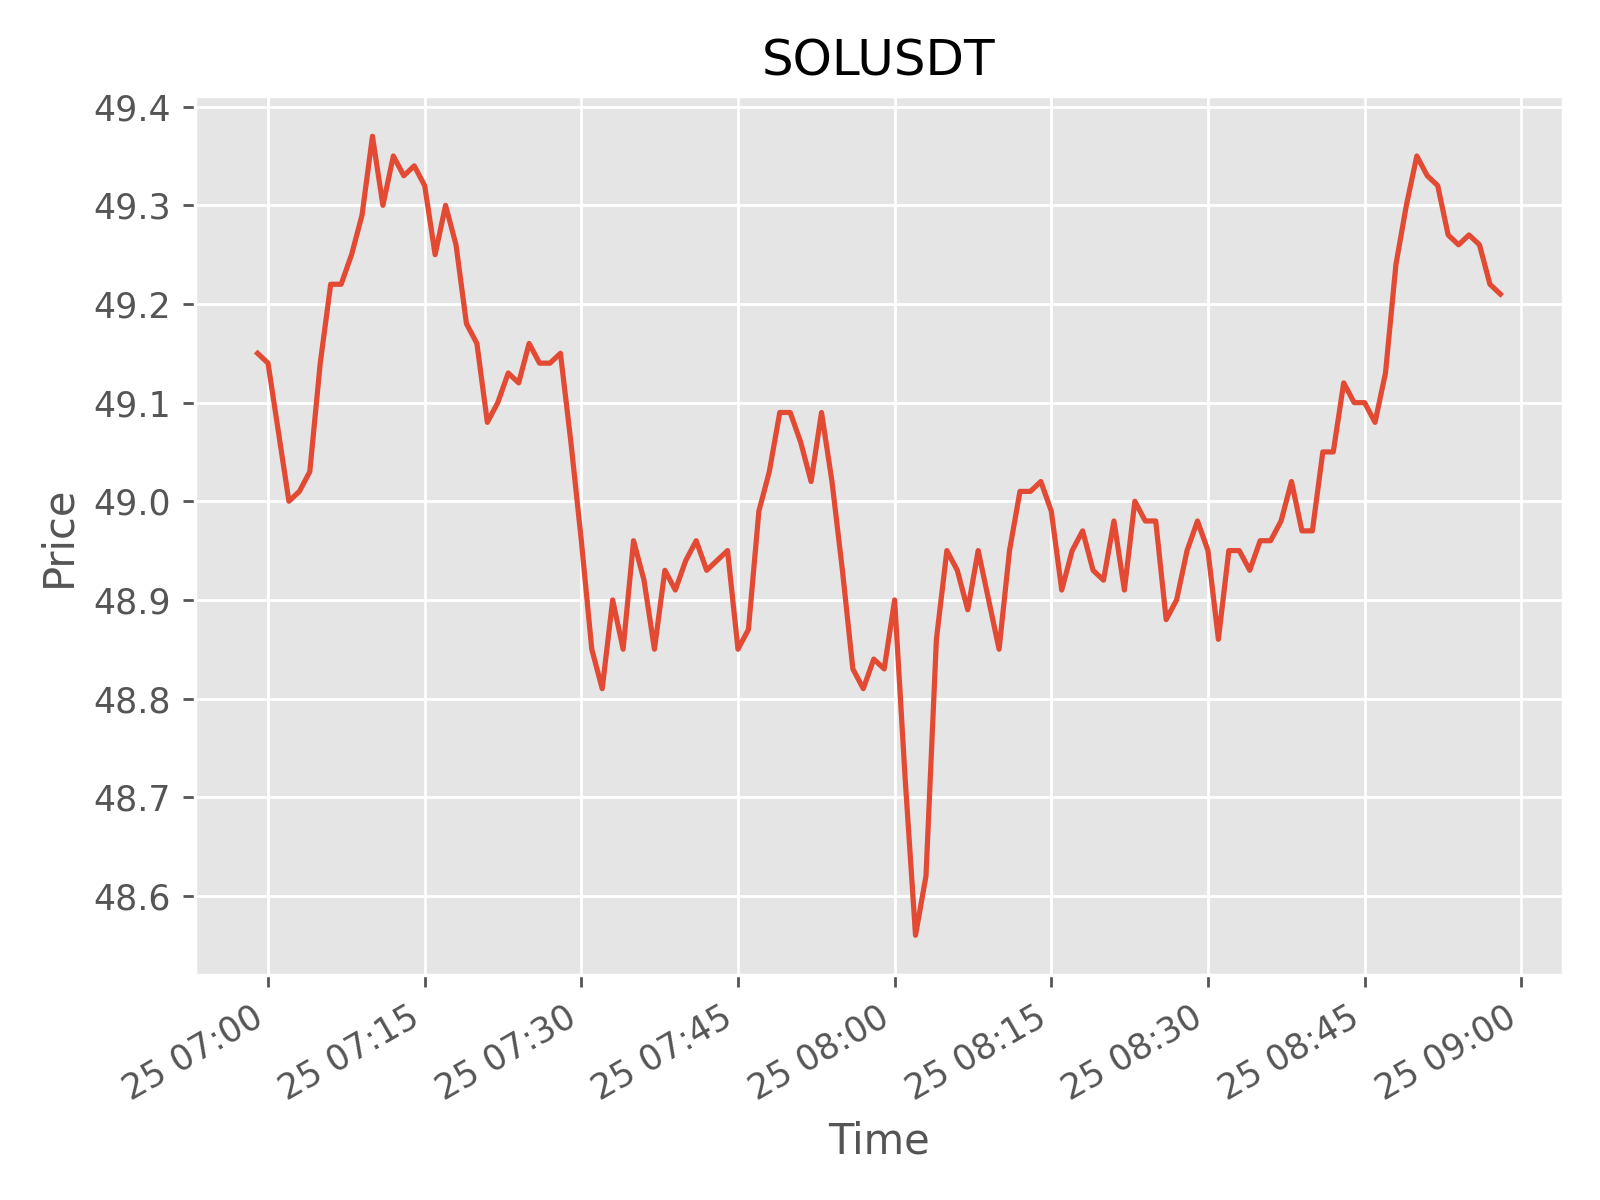

In [11]:
asset = 'SOLUSDT'
ani = FuncAnimation(plt.gcf(), animate, 1000)
#plt.figure(figsize=(14,7))
#plt.tight_layout()
#plt.show()

In [12]:
while True:
    print(client.get_historical_klines(asset, '1m', '120m')[0])
    break

[1653461520000, '49.19000000', '49.24000000', '49.15000000', '49.19000000', '2459.71000000', 1653461579999, '120988.16330000', 148, '1649.03000000', '81103.35730000', '0']
